In [144]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

## Clustering of CSV Files per Plate

In [145]:
import sys
sys.path.append('/Users/thorsten/code/ThorstenCodes/MorphoMind/')
from data_handling.params import LOCAL_DATA_PATH
platenr = '26166' #change Plate Number here
csv_file_path = os.path.join(LOCAL_DATA_PATH, f'{platenr}/raw/mean_well_profiles.csv')


In [146]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Preprocess the data: let's assume all columns except the first one (usually an ID or label column) are features
features = df.columns[1:]
X = df[features]


In [147]:
# Assuming the first column contains non-numeric data
numeric_data = df.select_dtypes(include=[np.number])

# Perform imputation on numeric data only
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Standardize the numeric data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_imputed)

/Users/thorsten/.pyenv/versions/3.10.6/envs/MorphoMind/lib/python3.10/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Metadata_pert_id_vendor']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [148]:
n_clusters = 4  # This is an example, adjust based on your needs

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_data_scaled)
#df['Cluster'] = kmeans.fit_predict(numeric_data_scaled)

In [149]:
# Reduce the data to two principal components for visualization
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(numeric_data_scaled)

# # Plot the clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='tab10', marker='o', alpha=0.6)
# plt.title('Clusters Visualization')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster Label')
# plt.legend()
# plt.show()

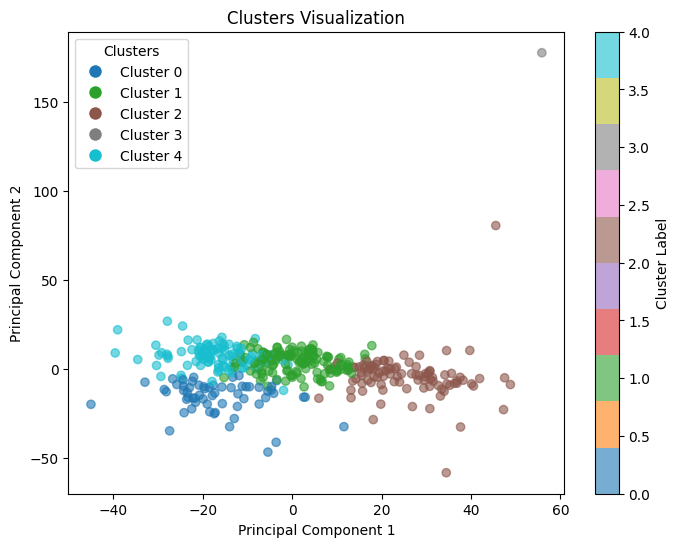

In [151]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming numeric_data_scaled is defined and scaled appropriately
# Example: numeric_data_scaled = np.random.rand(100, 10) # Dummy data for illustration

# Reduce the data to two principal components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data_scaled)

n_clusters = 5  # Adjust based on your needs

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='tab10', marker='o', alpha=0.6)
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a colorbar
plt.colorbar(scatter, label='Cluster Label')

# Create a legend
legend_labels = {i: f'Cluster {i}' for i in range(n_clusters)}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                             markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(n_clusters)]
plt.legend(handles=legend_handles, title="Clusters")

plt.show()


## Create New Processed_CSV folder with the Labels

In [152]:
#Specify the new file path for saving
new_csv_file_path = os.path.join(LOCAL_DATA_PATH, f'{platenr}/processed_images/{platenr}_wells_labeled.csv')

In [153]:
# Add the cluster labels to the DataFrame as a new column called 'Labels'
df['Labels'] = clusters

In [154]:
# Save the updated DataFrame to the new CSV file
df.to_csv(new_csv_file_path, index=False)  # Set index=False to avoid saving with an unnamed index column

In [155]:
df.head()

,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_ASSAY_WELL_ROLE,Metadata_broad_sample,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_pert_id,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,Labels
0,26166,a01,26166,C-2113-01-D39-005,a01,mock,DMSO,0.0,DMSO,NaN,...,1.905441,1.884012,1.906427,1.532317,1.678034,1.633477,2.425723,2.512756,2.512642,4
1,26166,a02,26166,C-2113-01-D39-005,a02,mock,DMSO,0.0,DMSO,NaN,...,1.670166,1.664572,1.683104,1.683779,1.811099,1.786893,2.385734,2.282946,2.326966,4
2,26166,a03,26166,C-2113-01-D39-005,a03,treated,BRD-K24523560-001-05-9,5.0,DMSO,BRD-K24523560,...,1.404257,1.468187,1.442591,1.766197,1.826074,1.839563,2.510972,2.387576,2.464637,1
3,26166,a04,26166,C-2113-01-D39-005,a04,treated,BRD-K06152379-001-05-0,5.0,DMSO,BRD-K06152379,...,1.709977,1.788899,1.766412,1.743463,1.872824,1.835874,2.554825,2.501928,2.503239,4
4,26166,a05,26166,C-2113-01-D39-005,a05,treated,BRD-K94992087-001-05-5,5.0,DMSO,BRD-K94992087,...,1.716477,1.649997,1.658537,1.629931,1.771015,1.692962,2.354341,2.331471,2.365647,4


In [141]:
#Plate 2
# Extracting wells based on labels and converting them to lists
wells_with_label_0_list = df[df['Labels'] == 0]['Metadata_Well'].tolist()
wells_with_label_3_list = df[df['Labels'] == 3]['Metadata_Well'].tolist()
wells_with_label_5_list = df[df['Labels'] == 5]['Metadata_Well'].tolist()

# Creating a dictionary with clusters as keys and lists of wells as values
clusters_wells = {
    'Cluster 0': wells_with_label_0_list,
    'Cluster 1': wells_with_label_3_list,
    'Cluster 2': wells_with_label_5_list
}

# Now you can print or use clusters_wells as needed
for cluster, wells in clusters_wells.items():
    # Joining the list of wells into a string with each enclosed in single quotes
    wells_str = "', '".join(wells)  # This correctly adds ', ' between each well
    # Adding a single quote to the start and end of the string
    wells_str = f"'{wells_str}'"
    print(f"{cluster}: [{wells_str}]")


Cluster 0: ['a06', 'a07', 'a10', 'a16', 'a17', 'a24', 'b12', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b23', 'c16', 'c22', 'c24', 'd15', 'd22', 'd24', 'e14', 'f16', 'f18', 'f20', 'f22', 'f23', 'f24', 'g14', 'g20', 'h12', 'h15', 'h20', 'h22', 'h24', 'i19', 'i20', 'i21', 'i23', 'i24', 'j16', 'j21', 'j22', 'j23', 'j24', 'k18', 'k23', 'l19', 'l20', 'm18', 'm19', 'm21', 'm23', 'm24', 'n18', 'n20', 'n21', 'o24', 'p23']
Cluster 1: ['o20']
Cluster 2: ['b06', 'b07', 'c05', 'c06', 'c09', 'd03', 'd04', 'd06', 'e01', 'e02', 'e03', 'e04', 'e05', 'e07', 'e08', 'e10', 'e11', 'f01', 'f02', 'f03', 'f04', 'f05', 'f06', 'f07', 'f10', 'g01', 'g03', 'g04', 'g05', 'g06', 'g08', 'g11', 'g12', 'g13', 'h01', 'h02', 'h03', 'h04', 'h06', 'h07', 'h10', 'h13', 'h14', 'h16', 'h17', 'i01', 'i02', 'i03', 'i06', 'i07', 'i08', 'i13', 'i16', 'j06', 'j08', 'j09', 'j17', 'j18', 'k07', 'k08', 'k11', 'k12', 'k13', 'k14', 'k15', 'k16', 'k17', 'l04', 'l08', 'l10', 'l11', 'l12', 'l15', 'l16', 'l17', 'm01', 'm06', 'm07', 'm08'

In [122]:
# Extracting wells based on labels and converting them to lists
wells_with_label_3_list = df[df['Labels'] == 3]['Metadata_Well'].tolist()
wells_with_label_5_list = df[df['Labels'] == 5]['Metadata_Well'].tolist()

# Creating a dictionary with clusters as keys and lists of wells as values
clusters_wells = {
    'Cluster 3': wells_with_label_3_list,
    'Cluster 5': wells_with_label_5_list
}

# Now you can print or use clusters_wells as needed
for cluster, wells in clusters_wells.items():
    # Joining the list of wells into a string with each enclosed in single quotes
    wells_str = "', '".join(wells)  # This correctly adds ', ' between each well
    # Adding a single quote to the start and end of the string
    wells_str = f"'{wells_str}'"
    print(f"{cluster}: [{wells_str}]")


Cluster 3: ['d24', 'g24', 'i24', 'j17']
Cluster 5: ['b04', 'e03', 'f10', 'i16', 'j21', 'p22']


In [158]:
#Plate 26166
# Extracting wells based on labels and converting them to lists
wells_with_label_0_list = df[df['Labels'] == 0]['Metadata_Well'].tolist()
wells_with_label_1_list = df[df['Labels'] == 1]['Metadata_Well'].tolist()
wells_with_label_2_list = df[df['Labels'] == 2]['Metadata_Well'].tolist()
wells_with_label_3_list = df[df['Labels'] == 3]['Metadata_Well'].tolist()
wells_with_label_4_list = df[df['Labels'] == 4]['Metadata_Well'].tolist()

# Creating a dictionary with clusters as keys and lists of wells as values
clusters_wells = {
    'Cluster 0': wells_with_label_0_list,
    'Cluster 1': wells_with_label_1_list,
    'Cluster 2': wells_with_label_2_list,
    'Cluster 3': wells_with_label_3_list,
    'Cluster 4': wells_with_label_4_list
}

# Now you can print or use clusters_wells as needed
for cluster, wells in clusters_wells.items():
    # Joining the list of wells into a string with each enclosed in single quotes
    wells_str = "', '".join(wells)  # This correctly adds ', ' between each well
    # Adding a single quote to the start and end of the string
    wells_str = f"'{wells_str}'"
    print(f"{cluster}: [{wells_str}]")


Cluster 0: ['a06', 'a07', 'a10', 'a15', 'a16', 'a17', 'a24', 'b12', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b23', 'c16', 'c22', 'c24', 'd15', 'd22', 'd24', 'e14', 'e20', 'f16', 'f18', 'f20', 'f22', 'f23', 'f24', 'g14', 'g20', 'h12', 'h20', 'h22', 'h24', 'i19', 'i20', 'i21', 'i23', 'i24', 'j16', 'j21', 'j22', 'j23', 'j24', 'k18', 'k23', 'l20', 'm05', 'm18', 'm19', 'm21', 'm23', 'm24', 'n18', 'n20', 'n21', 'o24', 'p20', 'p23']
Cluster 1: ['a03', 'a09', 'a23', 'b04', 'b08', 'b10', 'b11', 'b24', 'c02', 'c03', 'c04', 'c07', 'c08', 'c11', 'c13', 'd02', 'd04', 'd05', 'd08', 'd09', 'd11', 'd12', 'd13', 'e06', 'e09', 'e12', 'e13', 'e18', 'f05', 'f08', 'f09', 'f11', 'f12', 'f13', 'f14', 'f15', 'g07', 'g09', 'g10', 'g15', 'g16', 'g17', 'g18', 'g22', 'g24', 'h05', 'h08', 'h09', 'h15', 'h19', 'h21', 'i04', 'i05', 'i09', 'i10', 'i11', 'i12', 'i14', 'i15', 'i17', 'i18', 'j01', 'j02', 'j03', 'j04', 'j05', 'j07', 'j10', 'j11', 'j12', 'j13', 'j14', 'j15', 'j17', 'j19', 'k01', 'k02', 'k03', 'k04', 'k0